In [458]:
#-------------------------- import packages --------------------------
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

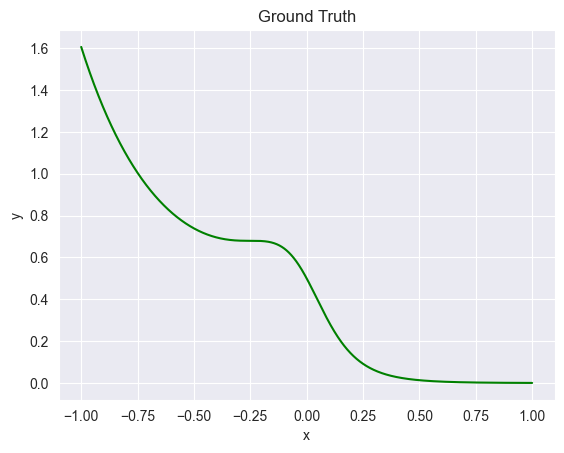

In [459]:
'''this block of code is used to test some sample function'''
#-------------------------- generate function --------------------------
X = np.linspace(-1, 1, 10000)
y = np.exp(-4*X) /(2* (1 + 16*X**2))

#-------------------------- plot --------------------------
# Ground truth
plt.plot(X, y, color = 'green')
plt.title('Ground Truth')
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)
plt.show()

In [460]:
#-------------------------- generate data features --------------------------
np.random.seed(0)
num_vars = 10 # number of variables to generate
num_samples = 20_000 # number of observations
cat_vars = {} # name and number of categories
variables = {}
for i in range(1, num_vars + 1):
    
    # continuous variables
    if f"X{i}" not in cat_vars.keys():
        variables[f'X{i}'] = np.random.uniform(-1, 1, num_samples)
    
    # categorical variables
    else:
        variables[f'X{i}'] = np.random.randint(0, cat_vars[f"X{i}"], num_samples)

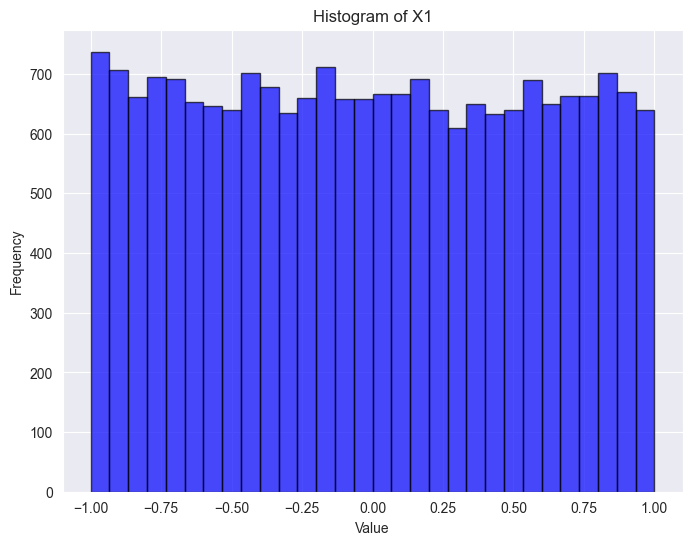

In [461]:
#-------------------------- check numeric --------------------------
plt.figure(figsize = (8, 6))
plt.hist(variables["X1"], bins = 30, color = 'blue', alpha = 0.7, edgecolor = 'black')
plt.title('Histogram of X1')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

In [462]:
# #-------------------------- check categorical --------------------------
# # Get the distinct values and their frequencies
# values, counts = np.unique(variables["X7"], return_counts=True)

# plt.figure(figsize = (8, 6))
# plt.bar(values, counts, color = 'blue', alpha = 0.7, edgecolor = 'black')

# # Add titles and labels
# plt.title('Bar Chart of X7')
# plt.xlabel('Value')
# plt.ylabel('Frequency')
# plt.grid(True, axis = 'y')  # Add gridlines along the y-axis
# plt.show()

In [463]:
#-------------------------- define functions to calculate main and pairwise interaction effect --------------------------

# main effect
def main_effect(var_name, var_values):
    if var_name == "X1":
        return np.abs(var_values) * np.sin(8 * var_values)
    elif var_name == "X2":
        return 1/2*np.sin(8*var_values)**3 - np.cos(4*var_values)/4 + (var_values**2)/4

# pairwise interaction
def interaction_effect(var_name, var1, var2):
    if var_name == "f34":
        return -(var1 + 0.5) * np.exp(-var2)
        # return - (var1 + 1) * np.abs(var2 - 0.3)
    elif var_name == "f56":
        return 2 * np.sin(2 * np.pi * (var1 - 0.5) * (var2 + 0.5))
    # elif var_name == "f78":
    #     return np.exp(-2 * var1**2 - (12 * var1**2 + 10 * var2**2 - 5)**2)

### Main Effects:

<!-- 1. $ f_1(X_1) $:
$$
f_1(X_1) = \frac{1}{4}\frac{e^{-4X_1}}{1 + 16X_1^2}
$$ -->

1. $ f_1(X_1) $:
$$
f_1(X_1) = |X_1| \sin(8X_1)
$$

2. $ f_2(X_2) $:
$$
f_2(X_2) = \frac{1}{2}\sin^3(8X_2) - \frac{\cos(4X_2)}{4} + \frac{X_2^2}{4}
$$

### Pairwise Interaction Effects:

1. $ f_{34}(X_3, X_4) $:
$$
f_{34}(X_3, X_4) = -(X_3 + 0.5)e^{-X_4}
$$

2. $ f_{56}(X_5, X_6) $:
$$
f_{56}(X_5, X_6) = \sin(2\pi (X_5 - 0.5)(X_6 + 0.5))
$$
<!-- 
3. $ f_{78}(X_7, X_8) $:
$$
f_{78}(X_7, X_8) = 2e^{-2 X_7^2 - \left(12X_7^2 + 10X_8^2 - 5 \right)^2}
$$ -->

In [464]:
#-------------------------- generate mean response --------------------------
effect = {}

# Main effects
for i in range(1, 3):
    effect[f"f{i}"] = main_effect(f"X{i}", variables[f"X{i}"])

# Interaction effects
effect["f34"] = interaction_effect("f34", variables["X3"], variables["X4"])
effect["f56"] = interaction_effect("f56", variables["X5"], variables["X6"])
# effect["f78"] = interaction_effect("f78", variables["X7"], variables["X8"])

# Calculate mu - the log of the mean response
mu = 6 + sum(effect.values())

Text(0.5, 1.0, 'Distribution of Log(E(Y|X))')

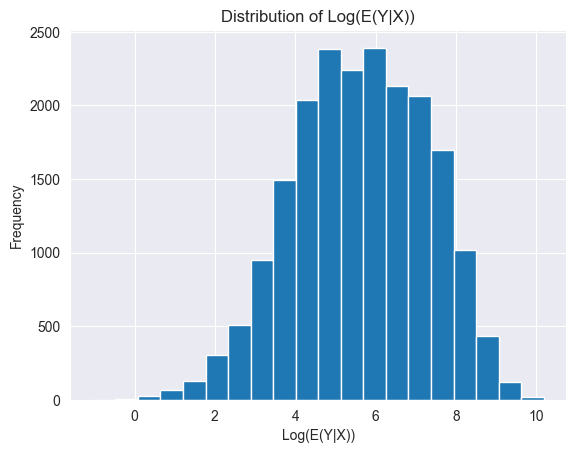

In [465]:
#-------------------------- mean response distribution --------------------------
plt.hist(mu, bins = 20)
plt.xlabel("Log(E(Y|X))")
plt.ylabel("Frequency")
plt.title("Distribution of Log(E(Y|X))")

In [466]:
#-------------------------- check min/mean/max of mu --------------------------
print(f"Min of mu: {np.min(mu)}")
print(f"Mean of mu: {np.mean(mu)}")
print(f"Max of mu: {np.max(mu)}")

Min of mu: -1.0393937506005617
Mean of mu: 5.627854459912904
Max of mu: 10.185518176647546


In [467]:
#-------------------------- check min/mean/max of exp(mu) --------------------------
print(f"Min of exp(mu): {np.exp(np.min(mu))}")
print(f"Mean of exp(mu): {np.exp(np.mean(mu))}")
print(f"Max of exp(mu): {np.exp(np.max(mu))}")

Min of exp(mu): 0.35366902861464694
Mean of exp(mu): 278.0648778189929
Max of exp(mu): 26516.38642807434


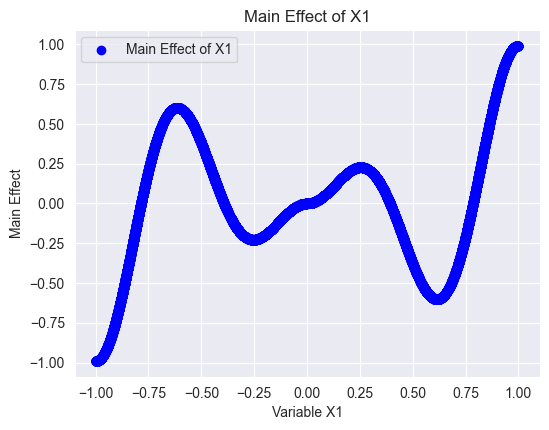

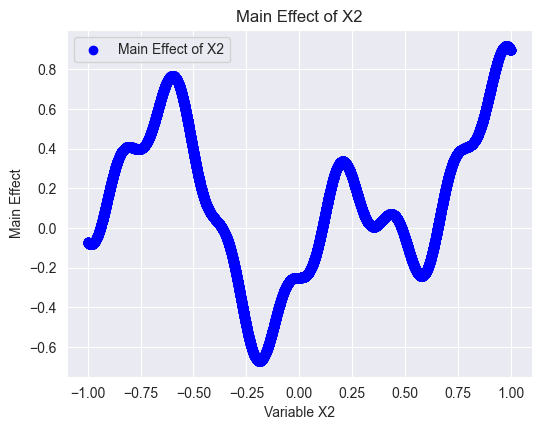

In [468]:
#-------------------------- plot functions for main effect --------------------------
for i in range(1,len(variables) + 1):
    
    if i in [1, 2]:
        var = f"X{i}"
        values = variables[var]  # get the values for the current variable
        
        # Calculate the main effect
        effect = main_effect(var, values)
        
        # Create the plot
        plt.figure(figsize=(6, 4.5))
        
        # If the variable is categorical, use line plot
        if var in cat_vars:
            unique_vals = np.unique(values)
            mean_effects = [np.mean(effect[values == val]) for val in unique_vals]
            plt.plot(unique_vals, mean_effects, marker='o', color='blue', label=f'Main Effect of {var}', linestyle='-')
        else:
            plt.scatter(values, effect, color='blue', label=f'Main Effect of {var}')
        
        # Add labels and title
        plt.xlabel(f'Variable {var}')
        plt.ylabel('Main Effect')
        plt.title(f'Main Effect of {var}')
        plt.legend()
        plt.grid(True)
        
        # Show the plot
        plt.show()

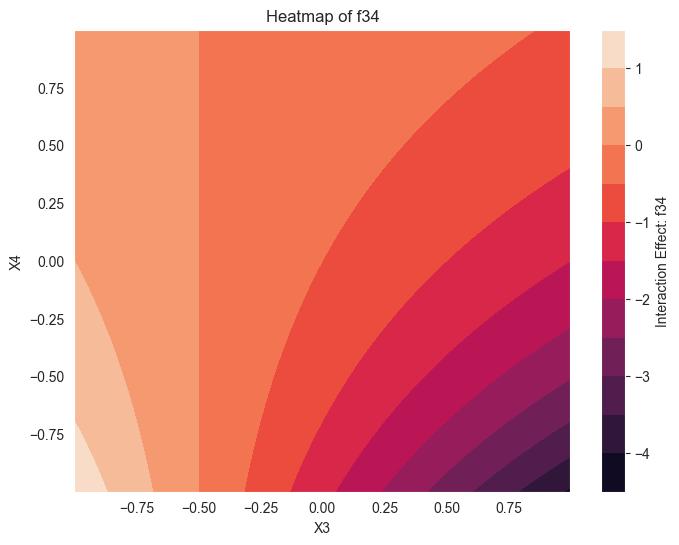

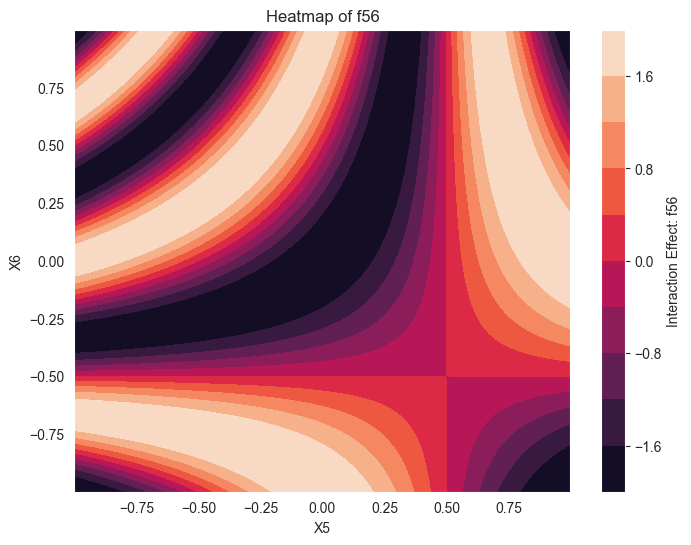

In [469]:
#-------------------------- plot the pairwise interaction effect --------------------------
# Interaction plots
interaction_pairs = {
    "f34": ("X3", "X4"),
    "f56": ("X5", "X6")
    # "f78": ("X7", "X8")
}

# Loop through each interaction effect and plot the heatmap
for interaction, (var1, var2) in interaction_pairs.items():
    x1 = variables[var1]
    x2 = variables[var2]
    
    # Create a meshgrid for plotting
    X1, X2 = np.meshgrid(np.linspace(x1.min(), x1.max(), 100), np.linspace(x2.min(), x2.max(), 100))
    
    # Calculate the interaction effect using the defined function
    if interaction == "f34":
        Y = - (X1 + 0.5) * np.exp(-X2)
        # Y = - (X1 + 1) * np.abs(X2 - 0.3)
    elif interaction == "f56":
        Y = 2 * np.sin(2 * np.pi * (X1 - 0.5) * (X2 + 0.5))
    # elif interaction == "f78":
    #     Y = np.exp(-2 * X1**2 - (12 * X1**2 + 10 * X2**2 - 5)**2)

    # Create the heatmap
    plt.figure(figsize = (8, 6))
    plt.contourf(X1, X2, Y, levels = 10)
    plt.colorbar(label = f'Interaction Effect: {interaction}')
    plt.title(f'Heatmap of {interaction}')
    plt.xlabel(var1)
    plt.ylabel(var2)
    plt.show()

In [470]:
#-------------------------- generate target variables --------------------------
data = pd.DataFrame(variables)

'assume a Gamma distribution with mean = exp(mu)'
phi_low = 1 # dispersion for low variance distribution
phi_high = 5 # dispersion for low variance distribution

# for low variance
response_low = np.random.gamma(shape = 1/phi_low, scale = phi_low*np.exp(mu))
data_low = data.copy()
data_low["Y"] = response_low

# for high variance
response_high = np.random.gamma(shape = 1/phi_high, scale = phi_high*np.exp(mu))
data_high = data.copy()
data_high["Y"] = response_high

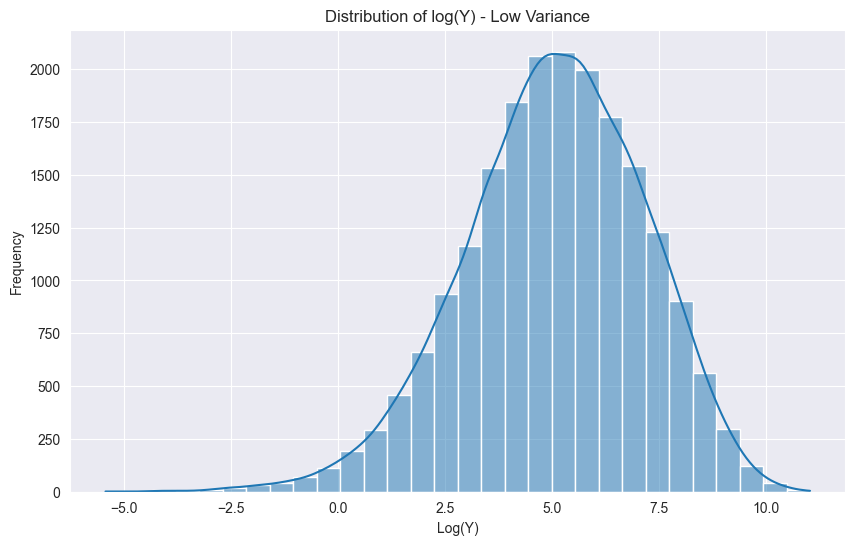

In [471]:
#-------------------------- distribution of log(response) - low variance --------------------------
plt.figure(figsize = (10, 6)) # set the size of the figure
sns.set_style("darkgrid")
sns.histplot(np.log(data_low['Y']), bins = 30, kde = True) # draw the chart
plt.title('Distribution of log(Y) - Low Variance')
plt.xlabel('Log(Y)')
plt.ylabel('Frequency')
plt.tick_params(axis = 'x')
plt.tick_params(axis = 'y')
plt.grid(True)
plt.show()

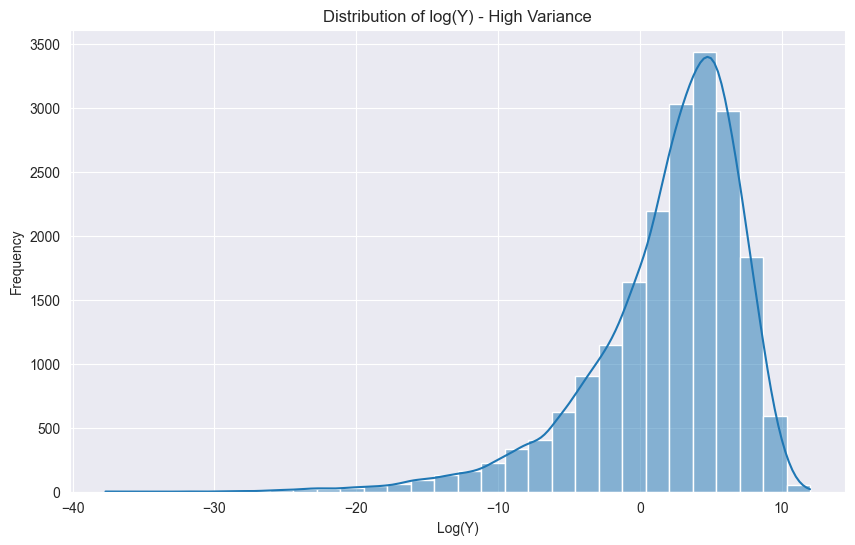

In [472]:
#-------------------------- distribution of log(response) - high variance --------------------------
plt.figure(figsize = (10, 6)) # set the size of the figure
sns.set_style("darkgrid")
sns.histplot(np.log(data_high['Y']), bins = 30, kde = True) # draw the chart
plt.title('Distribution of log(Y) - High Variance')
plt.xlabel('Log(Y)')
plt.ylabel('Frequency')
plt.tick_params(axis = 'x')
plt.tick_params(axis = 'y')
plt.grid(True)
plt.show()

In [473]:
#-------------------------- export data --------------------------
data_low.to_csv("synthetic_low_var.csv", index = False)
data_high.to_csv("synthetic_high_var.csv", index = False)